<h1 align = 'center'> <b><u>Multiple Linear Regression</u></b> </h1>

**Simple Linear Regression**: <h5 align=center>$$Y = \theta_0 + \theta_1 X + \epsilon$$</h5>

**Multiple Linear Regression**: <h5 align=center>$$Y = \theta_0 + \theta_1 X_1 + \theta_2 X_2 +...+ \theta_p X_p + \epsilon$$ </h5>
<h5 align=center> $$sales = \theta_0 + \theta_1 \times TV + \theta_2 \times radio + \theta_3 \times newspaper + \epsilon$$ </h5>

In our dataset, TV, radio and newspaper are the advertisement mediums.

### 1. Importing necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from yellowbrick.regressor import PredictionError, ResidualsPlot

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

C:\Users\admin\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
plt.style.use("ggplot") # ggplot style module (by 'R')
plt.rcParams['figure.figsize'] = (12, 8) # handles all default styles/values

### 2. Loading the data.

#### The adverstiting data captures sales revenue generated with respect to different advertisement spends across multiple advertisement mediums like radio, tv and newspaper.

In [3]:
ad = pd.read_csv('Advertising.csv')
ad.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.4 KB


### 3. Relationship between Dependent and Independent variables.

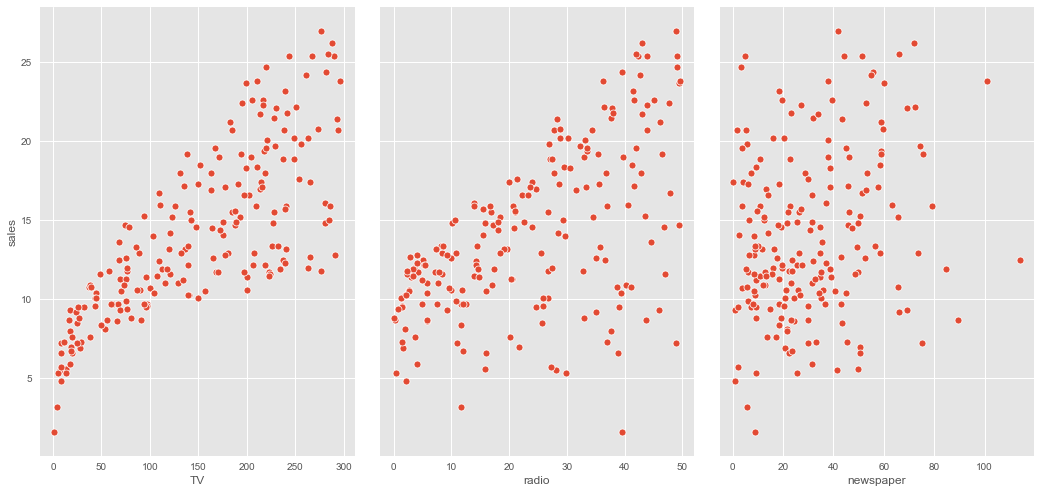

In [5]:
sns.pairplot(ad, x_vars = ['TV', 'radio', 'newspaper'], y_vars = 'sales', height = 7, aspect = 0.7);

#### From the above graphs, we can say that:
<b><ul><li> most of the sales is generated by TV as it shows strong positive correlation between Sales & TV.</li>
    <li> there is a slight positive correlation between Sales and radio, although it also contributes in the revenue.</li>
    <li> there is a weak positive correlation between Sales and newspaper having less contribution in revenue.</li>
</ul></b>

### 4. Estimating coefficients.

In [6]:
X = ad[['TV', 'radio', 'newspaper']]
y = ad.sales

lm1 = LinearRegression()
lm1.fit(X, y)

print('The intercept is ', lm1.intercept_)
print('The coefficients are ', lm1.coef_)

The intercept is  2.9388893694594067
The coefficients are  [ 0.04576465  0.18853002 -0.00103749]


In [7]:
list(zip(['TV', 'radio', 'newspaper'], lm1.coef_))

[('TV', 0.04576464545539761),
 ('radio', 0.18853001691820462),
 ('newspaper', -0.0010374930424762972)]

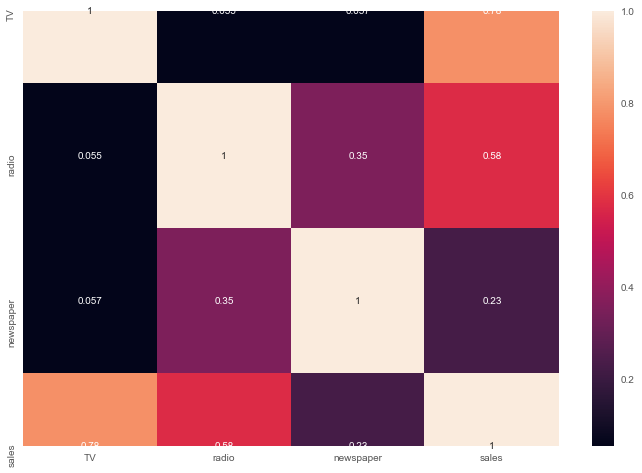

In [8]:
sns.heatmap(ad.corr(), annot = True);

### 5. Feature Selection.

#### As there is a very weak positive correlation between Sales and newspaper. We will remove newspaper feature in the second model just to compare the R^2 scores.

In [9]:
lm2 = LinearRegression().fit(X[['TV', 'radio']], y)
lm2_preds = lm2.predict(X[['TV', 'radio']])

print('R^2 score: ', r2_score(y, lm2_preds))

R^2 score:  0.8971942610828956


#### The third model includes all the features.

In [10]:
lm3 = LinearRegression().fit(X[['TV', 'radio', 'newspaper']], y)
lm3_preds = lm3.predict(X[['TV', 'radio', 'newspaper']])

print('R^2 score: ', r2_score(y, lm3_preds))

R^2 score:  0.8972106381789522


#### It is hard to tell by comparing the R^2 values for both the models, i.e. one model with two features excluding newspaper and the another model including all the three features. Thus, we will have to use train/test split with RMSE to see whether newspaper should be kept in the model or not.

### 6. Model Evaluation Using Train/Test Split and Metrics

**Mean Absolute Error (MAE):** <h5 align=center>$$\frac{1}{n}\sum_{i=1}^{n} \left |y_i - \hat{y_i} \right |$$</h5>
**Mean Squared Error (MSE):** <h5 align=center>$$\frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y_i})^2$$</h5>
**Root Mean Squared Error (RMSE)**: <h5 align=center>$$\sqrt{\frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y_i})^2}$$</h5>

#### Fourth model described below has all the three variables/features.

In [11]:
X = ad[['TV', 'radio', 'newspaper']]
y = ad.sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

lm4 = LinearRegression().fit(X_train, y_train)
lm4_preds = lm4.predict(X_test)

print('RMSE: ', np.sqrt(mean_squared_error(y_test, lm4_preds)))
print('R^2: ', r2_score(y_test, lm4_preds))

RMSE:  1.4046514230328955
R^2:  0.9156213613792232


#### Fifth model described below has only two variables excluding newspaper.

In [12]:
X = ad[['TV', 'radio']]
y = ad.sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

lm5 = LinearRegression().fit(X_train, y_train)
lm5_preds = lm5.predict(X_test)

print('RMSE: ', np.sqrt(mean_squared_error(y_test, lm5_preds)))
print('R^2: ', r2_score(y_test, lm5_preds))

RMSE:  1.3879034699382888
R^2:  0.9176214942248908


#### By comparing the RMSE values for both fourth and fifth models, we can say that the fifth model which excludes newspaper is a good model in comparison with the fourth model.

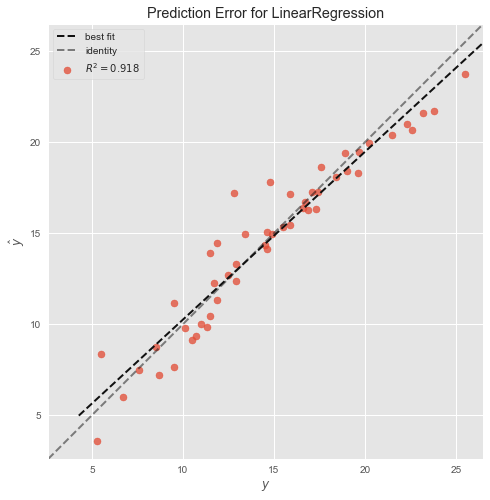

In [13]:
visualizer = PredictionError(lm5).fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof();

### 7. Interaction Effect (Synergy)

### Synergy means to combine two or more variables to have a significantly larger effect on a variable as compared to the sum of the individual variables alone.
### To componsate for the newspaper variable, we are combining TV and radio varibales to see if it decreases the error and improves the R^2 from its preceding models. There is a possibility there will be an increase in sales revenue if we invest in both TV and radio partially rather than investing in one completely (which will also fulfill the linearity and additivity properties of the multiple regression model).

In [14]:
ad['interaction'] = ad['TV'] * ad['radio']

X = ad[['TV', 'radio', 'interaction']]
y = ad.sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

lm6 = LinearRegression().fit(X_train, y_train)
lm6_preds = lm6.predict(X_test)

print('RMSE: ', np.sqrt(mean_squared_error(y_test, lm6_preds)))
print('R^2: ', r2_score(y_test, lm6_preds))

RMSE:  0.7011871137164327
R^2:  0.978973681468126


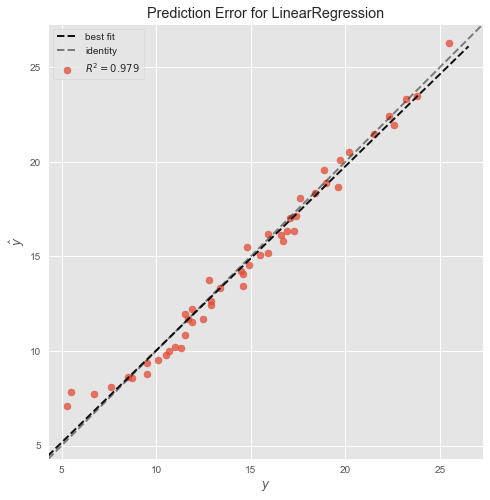

In [15]:
visualizer = PredictionError(lm6).fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof();

### Hence, sixth model (synergy model) is more reliable as it has greater R^2 value and lesser RMSE value than the other models. Also, the line of best fit covers the ideal line at its best in the above graph. 